# Notebook 6: DPPD Analysis of Temperature anomalies done state, district and mandal wise.
The notebook uses Linear regression to find trends in temperature anomalies and see how their rate is changing over time.

In [202]:
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
import xarray as xr

In [203]:
import warnings
warnings.filterwarnings("ignore")

In [235]:
df = pd.read_csv("mandalanomalies.csv") #read saved mandal anomalies data from Notebook 5

In [236]:
df.head(2)

,index,0,1,2,3,4,5,6,7,8,...,863,864,865,866,867,868,869,870,mandals,geometry
0,0,0.50,-0.69,-1.48,0.34,2.83,-1.11,-0.45,0.07,-0.14,...,0.37,1.42,1.46,1.39,0.84,0.71,-0.06,0.01,Abdullapurmet,POLYGON ((78.58558260100006 17.346747761000074...
1,1,0.37,-0.26,-0.15,0.34,2.47,-1.39,-0.73,0.07,-0.18,...,0.40,1.58,1.20,1.62,1.13,0.86,0.16,-0.02,Achampet,POLYGON ((79.06269374200008 16.446068728000057...


#### Note: This notebooks calculates both state level and mandal/district level values using the same functions and variables. To calulate results for state level uncomment the commented state code, and same for district/mandal level.

In [240]:
#for districts & mandals
coords = df[["mandals","geometry"]]

In [241]:
#For State level get coords using this
#coords = pd.read_csv("telacoords.csv")

In [243]:
df = df.drop(["mandals","geometry","index"], axis=1)
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
0,0.50,0.37,0.43,0.35,0.26,0.60,0.65,0.23,0.29,0.42,...,0.16,0.51,0.33,0.38,0.22,0.57,0.51,0.31,0.30,0.26
1,-0.69,-0.26,-0.18,-0.60,-0.47,-1.17,-1.15,-0.38,-1.09,-0.75,...,-0.40,-1.35,-1.19,-0.81,-1.17,-0.72,-0.74,-0.79,-0.89,-1.11
2,-1.48,-0.15,-0.28,-1.38,-0.55,-3.74,-3.79,-0.20,-2.32,-1.65,...,-0.84,-2.92,-2.26,-1.91,-2.74,-2.99,-2.93,-2.15,-2.24,-2.41
3,0.34,0.34,-0.15,-0.12,0.22,0.52,0.57,-0.03,0.12,0.03,...,0.08,0.43,0.05,0.39,0.41,0.51,0.54,0.50,0.52,0.20
4,2.83,2.47,2.81,2.95,2.70,2.98,2.97,2.33,2.92,2.92,...,2.42,3.25,2.90,2.85,3.00,3.10,3.06,2.89,2.97,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1.39,1.62,1.97,1.55,1.86,1.53,1.50,1.99,1.41,1.37,...,2.15,1.42,1.53,1.30,1.48,1.84,1.81,1.77,1.62,1.35
867,0.84,1.13,1.03,0.90,1.16,0.94,0.90,1.22,0.83,0.86,...,1.18,0.69,0.80,0.78,0.82,0.71,0.72,0.77,0.83,0.82
868,0.71,0.86,0.53,0.74,0.54,0.67,0.59,0.58,0.66,0.66,...,0.53,0.38,0.68,0.63,0.66,0.21,0.23,0.38,0.64,0.69
869,-0.06,0.16,0.19,0.12,0.26,0.04,0.00,0.29,0.00,-0.04,...,0.27,-0.12,0.17,-0.13,-0.02,-0.18,-0.12,0.07,0.00,-0.01


In [246]:
data_len = len(df.columns)
df = df.reset_index()
## Use if Index not coming properly
index = []
for i in range (0,len(df)):
    index.append(i)
    
df["index"] = index

In [247]:
#Calculating slope using linear regression.
scores = []

for i in range(0,data_len):
    
    X = np.array(df['index'])
    #print(X)
    X = X.reshape(-1, 1)
    #print(X)
    #i = str(i)
    #print(df[i])
    y = np.array(df[i])
    y = y.reshape(-1, 1)

    #Perform Linear Regression and obtain the slope
    reg = LinearRegression().fit(X, y)
    y_pred_trend = reg.predict(X)
    slope, intercept = np.polyfit(np.array(df['index']), y_pred_trend,1)
    line_slope = slope[0]
    
    scores.append(line_slope)

In [249]:
df = df.drop("index", axis = 1)
df = df.T

In [250]:
df["deviance"] = scores

In [252]:
# Use these for Telangana
#df["latitude"] = list(coords["latitude"])
#df["longitude"] = list(coords["longitude"])

#For districts and mandals 
df["geometry"]=coords["geometry"]
df["mandals"]= coords["mandals"]
df = df[["mandals","deviance","geometry"]]

In [253]:
#For state level data
'''import rioxarray                             
df2 = df[['latitude','longitude']]
df2['value'] = list(df['deviance'])
da = df2.set_index(['latitude', 'longitude']).to_xarray()
da = da.set_coords(['latitude', 'longitude'])
da.rio.to_raster('MandalAnomalyDPPD.tif')'''

"import rioxarray                             \ndf2 = df[['latitude','longitude']]\ndf2['value'] = list(df['deviance'])\nda = df2.set_index(['latitude', 'longitude']).to_xarray()\nda = da.set_coords(['latitude', 'longitude'])\nda.rio.to_raster('MandalAnomalyDPPD.tif')"

In [260]:
import gemgis as gg
# For Mandal data and Districts
from shapely import wkt

#df["geometry"] = df['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df[["mandals","deviance"]], geometry=df["geometry"], crs=4326)

In [261]:
gdf.to_file("mandaldeviances.geojson", driver="GeoJSON")

## Plotting State data

In [262]:
from osgeo import gdal
import matplotlib.pyplot as plt
from osgeo import osr
spatref = osr.SpatialReference()
spatref.ImportFromEPSG(4326)
crs_wkt = spatref.ExportToWkt()

dataset = gdal.Open('TelanganaTemperatureAnomalyDPPD.tif', gdal.GA_ReadOnly) 
dataset.SetProjection(crs_wkt)
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

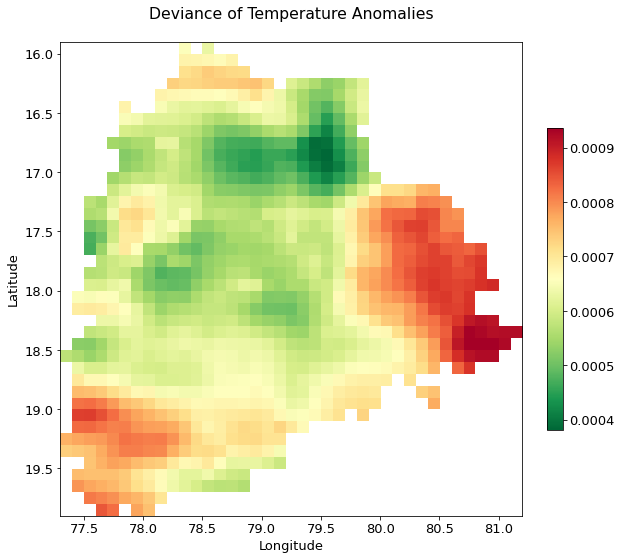

In [263]:
geotransform = dataset.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  dataset.RasterXSize
rows =  dataset.RasterYSize

projection = dataset.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

extentArray = [originX,finalX,originY,finalY]

plt.figure(figsize=(9,9))

im = plt.imshow(arr, cmap= "RdYlGn_r", extent=extentArray, origin="lower")
plt.colorbar(im, fraction=0.03)
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.rcParams.update({'font.size': 13})
plt.title("Deviance of Temperature Anomalies\n")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
print(" ")
plt.show()

## Plotting Mandal and District level data

In [264]:
gdf = gpd.read_file("districtdeviances.geojson")

In [266]:
gdf[gdf==0] = np.nan

<AxesSubplot:title={'center':'Deviance in Temperature Anomalies at District level\n'}, xlabel='Longitude', ylabel='Latitude'>

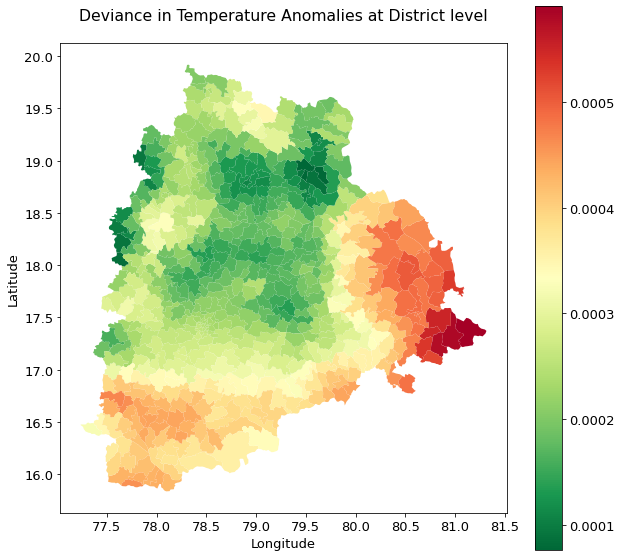

In [267]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,10))

plt.rcParams.update({'font.size': 13})
plt.title("Deviance in Temperature Anomalies at Mandal level\n")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
gdf.plot(column=min, ax=ax, legend=True, cmap="RdYlGn_r")